**Зчитуємо дані з файла "4.xyz" для контроля**

In [1]:
import math
import numpy as np
import scripts as sc

In [2]:
with open("4.xyz", "r") as file:
    lines = [line.split() for line in file.readlines()[2:]]
print(lines)

[['C', '-0.462015351', '0.180384790', '-1.669886306'], ['C', '0.087116489', '-1.012704479', '-0.864727070'], ['N', '0.140208369', '1.426422525', '-1.171561504'], ['O', '0.867376939', '-1.792613980', '-1.386440435'], ['C', '1.113982046', '1.518238160', '-0.074185217'], ['N', '-0.328537716', '-1.211582184', '0.531188128'], ['C', '-1.389875062', '-0.458085239', '1.216323908'], ['C', '-0.754867801', '0.556394791', '2.185445184']]


**Задаємо базові значення торсійних і валентних кутів(радіани) для знаходження координат та перевірки з контролем**

In [3]:
basic_names = ["C5", "N3", "C1", "C2", "N6", "C7", "C8", "O4"]
atom_coordinates_array = [["C"]+ [0,0,0, 1],["N"] + [0,0,0, 2], ["C"]+ [0,0,0, 2],
                                     ["C"]+ [0,0,0, 3], ["N"]+ [0,0,0, 2],
                                     ["C"]+ [0,0,0, 2], ["C"]+ [0,0,0, 1], ["O"]+[0,0,0, 1]]
valent_angles_array = [125.25*math.pi/180, 109.45*math.pi/180,
                       120.02*math.pi/180, 125.24*math.pi/180, 109.45*math.pi/180, 119.96*math.pi/180]

tors_angles_array = [-0.063*math.pi/180, 71.581*math.pi/180,
                     8.626*math.pi/180, -0.063*math.pi/180, -108.419*math.pi/180]

distances_array = [1.470, 1.471, 1.541, 1.470, 1.471, 1.540, 1.22]


In [4]:
alpha_matrixies = [np.array([
        [-math.cos(valent_angles_array[i]), -math.sin(valent_angles_array[i]), 0],
        [math.sin(valent_angles_array[i]), -math.cos(valent_angles_array[i]), 0],
        [0, 0, 1]]) for i in range(len(valent_angles_array))]

In [5]:
phi_matrixies =  [[[1, 0, 0], 
                  [0, math.cos(tors_angles_array[i]), -math.sin(tors_angles_array[i])], 
                  [0, math.sin(tors_angles_array[i]), math.cos(tors_angles_array[i])]] for i in range(len(tors_angles_array))]

In [6]:
Bj_matrixies_array = [np.array([distances_array[i], 0, 0]) for i in range(len(distances_array))]

**Тепер давайте побудуємо молекулу на основі цих матриць задля перевірки нашого кода**

In [7]:
atom_coordinates_array[0][1:4] = [0,0,0]
atom_coordinates_array[1][1:4] = Bj_matrixies_array[0]
atom_coordinates_array[2][1:4] = atom_coordinates_array[1][1:4] + np.dot(alpha_matrixies[0], Bj_matrixies_array[1])
atom_coordinates_array[3][1:4] = atom_coordinates_array[2][1:4] + np.dot(np.dot(np.dot(alpha_matrixies[0], phi_matrixies[0]), alpha_matrixies[1]), Bj_matrixies_array[2])
temp = []
temp.append(np.dot(np.dot(alpha_matrixies[0], phi_matrixies[0]), alpha_matrixies[1]))
atom_coordinates_array[4][1:4] = atom_coordinates_array[3][1:4] + np.dot(np.dot(np.dot(temp[0], phi_matrixies[1]), alpha_matrixies[2]), Bj_matrixies_array[3])
temp.append(np.dot(np.dot(temp[0], phi_matrixies[1]), alpha_matrixies[2]))
atom_coordinates_array[5][1:4] = atom_coordinates_array[4][1:4] + np.dot(np.dot(np.dot(temp[1], phi_matrixies[2]), alpha_matrixies[3]), Bj_matrixies_array[4])
temp.append(np.dot(np.dot(temp[1], phi_matrixies[2]), alpha_matrixies[3]))
atom_coordinates_array[6][1:4] = atom_coordinates_array[5][1:4] + np.dot(np.dot(np.dot(temp[2], phi_matrixies[3]), alpha_matrixies[4]), Bj_matrixies_array[5])
temp.append(np.dot(np.dot(temp[2], phi_matrixies[3]), alpha_matrixies[4]))
atom_coordinates_array[7][1:4] = atom_coordinates_array[3][1:4] + np.dot(np.dot(np.dot(temp[0], phi_matrixies[4]), alpha_matrixies[5]), Bj_matrixies_array[6])

**Виводимо дані у файл, який відкриваємо наприклад у PyMol та звіряємо зв'язки з кутами між атомами**

In [8]:
with open("results_of_laba4.pdb", "w") as file:
    
    for i in range(0, 8):
        atom = atom_coordinates_array[i]
        spaces = ' ' * (4 - len(str(i)))
        file.write(f"ATOM    {i+1}    {atom[0]}{' ' * (5 - len(atom[0]))}AA   1      {'   '.join([f'{element:.4f}' if element >= 0 else f'{element:.3f}' for element in atom[1:4]])}   1.00 0.00           {basic_names[i]}\n")

**Так, алгоритм будує молекулу майже досконально!
Тому зараз робимо цикл, де будемо змінювати кути фі та псі і оцінювати молекулу(чи зберігається та сама структура чи ні)**

In [26]:
basic_names = ["C5", "N3", "C1", "C2", "N6", "C7", "C8", "O4"]
atom_coordinates_array = [["C"]+ [0,0,0, 1],["N"] + [0,0,0, 2], ["C"]+ [0,0,0, 2],
                                     ["C"]+ [0,0,0, 3], ["N"]+ [0,0,0, 2],
                                     ["C"]+ [0,0,0, 2], ["C"]+ [0,0,0, 1], ["O"]+[0,0,0, 1]]
valent_angles_array = [125.25*math.pi/180, 109.45*math.pi/180,
                       120.02*math.pi/180, 125.24*math.pi/180, 109.45*math.pi/180, 119.96*math.pi/180]
distances_array = [1.470, 1.471, 1.541, 1.470, 1.471, 1.540, 1.22]
alpha_matrixies = [np.array([
        [-math.cos(valent_angles_array[i]), -math.sin(valent_angles_array[i]), 0],
        [math.sin(valent_angles_array[i]), -math.cos(valent_angles_array[i]), 0],
        [0, 0, 1]]) for i in range(len(valent_angles_array))]
Bj_matrixies_array = [np.array([distances_array[i], 0, 0]) for i in range(len(distances_array))]

with open("test_laba4.txt", "w") as file:

    for i in range(-180,180):
        for q in range(-180, 180):
            tors_angles_array = [-0.063*math.pi/180, i*math.pi/180,
                                 q*math.pi/180, -0.063*math.pi/180, -108.419*math.pi/180]
            phi_matrixies =  [[[1, 0, 0], 
                      [0, math.cos(tors_angles_array[i]), -math.sin(tors_angles_array[i])], 
                      [0, math.sin(tors_angles_array[i]), math.cos(tors_angles_array[i])]] for i in range(len(tors_angles_array))]
    
            atom_coordinates_array[0][1:4] = [0,0,0]
            atom_coordinates_array[1][1:4] = Bj_matrixies_array[0]
            atom_coordinates_array[2][1:4] = atom_coordinates_array[1][1:4] + np.dot(alpha_matrixies[0], Bj_matrixies_array[1])
            atom_coordinates_array[3][1:4] = atom_coordinates_array[2][1:4] + np.dot(np.dot(np.dot(alpha_matrixies[0], phi_matrixies[0]), alpha_matrixies[1]), Bj_matrixies_array[2])
            temp = []
            temp.append(np.dot(np.dot(alpha_matrixies[0], phi_matrixies[0]), alpha_matrixies[1]))
            atom_coordinates_array[4][1:4] = atom_coordinates_array[3][1:4] + np.dot(np.dot(np.dot(temp[0], phi_matrixies[1]), alpha_matrixies[2]), Bj_matrixies_array[3])
            temp.append(np.dot(np.dot(temp[0], phi_matrixies[1]), alpha_matrixies[2]))
            atom_coordinates_array[5][1:4] = atom_coordinates_array[4][1:4] + np.dot(np.dot(np.dot(temp[1], phi_matrixies[2]), alpha_matrixies[3]), Bj_matrixies_array[4])
            temp.append(np.dot(np.dot(temp[1], phi_matrixies[2]), alpha_matrixies[3]))
            atom_coordinates_array[6][1:4] = atom_coordinates_array[5][1:4] + np.dot(np.dot(np.dot(temp[2], phi_matrixies[3]), alpha_matrixies[4]), Bj_matrixies_array[5])
            temp.append(np.dot(np.dot(temp[2], phi_matrixies[3]), alpha_matrixies[4]))
            atom_coordinates_array[7][1:4] = atom_coordinates_array[3][1:4] + np.dot(np.dot(np.dot(temp[0], phi_matrixies[4]), alpha_matrixies[5]), Bj_matrixies_array[6])
            check = sc.connection_checker(atom_coordinates_array[0], atom_coordinates_array[6])
            if check[0] == "0":
                file.write(f'{i} {q} 0 {check[1]}\n')
            else:
                file.write(f'{i} {q} 1 {check[1]}\n')

**Виводимо результат**

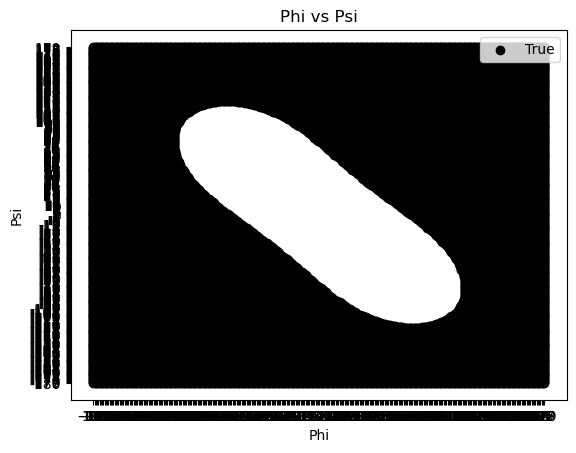

In [34]:
import matplotlib.pyplot as plt

# Чтение файла и извлечение данных
with open("test_laba4.txt", "r") as file:
    data = [line.split() for line in file]

# Разделение данных на списки углов и результатов
phis = []
psis = []
for num in range(len(data)):
    if data[num][2] == '1':
        phis.append(data[num][0])
        psis.append(data[num][1])

# Построение графика
plt.scatter(phis, psis, color='black', label='True')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Phi vs Psi')
plt.legend(loc = 1)
plt.show()